## Preparation: 
Splitting the Hellenistic Book Into Sections 

In [1]:
import os
import pandas as pd

In [2]:
plato_path = './plato.txt'
with open("plato.txt",'r') as plato, open("stoicism.txt", 'r') as stoicism, open("scepticism.txt",'r') as scepticism:
    plato_text = plato.read()
    stoicism_text = stoicism.read()
    scepticism_text = scepticism.read()
with open("aristotle.txt",'r') as aristotle, open("epicureanism.txt", 'r') as epicurean:
    aristotle_text = aristotle.read()
    epicureanism_text = epicurean.read()

In [3]:
texts_comp = plato_text + stoicism_text + scepticism_text + aristotle_text + epicureanism_text
school_dict = {"plato": plato_text, "stoicism": stoicism_text, "scepticism": scepticism_text, 
              "aristotle": aristotle_text, "epicureanism": epicureanism_text}

## Cleanig:

In [4]:
import re
import requests 
import nltk 
from nltk import FreqDist,sent_tokenize, word_tokenize
import string
import sys
import numpy as np
import matplotlib.pyplot as plt
import wordcloud

In [5]:
#removing numbers and symbols
for school in school_dict.keys():
    school_dict[school] = re.sub(r'[0123456789]', ' ', school_dict[school])

In [6]:
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiayibai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stopword_list = stopwords.words("english") + list(string.punctuation) + ['“','”','...',"''",'’','``', "'", "‘"] 

In [8]:
# from the online gist: https://gist.github.com/rg089/35e00abf8941d72d419224cfd5b5925d by 
online_stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
online_stopwords = set(online_stopwords_list.decode().splitlines()) 

In [9]:
final_stopword_list = list(online_stopwords) + stopword_list + ['theaetetus','clinias', 'chrysippus',
                                                                'alcibiade', 'alcibiades','II', 'III', 'IV', 'VI',
                                                               'VII', 'VIII', 'IX', 'Chrysippus', 'SVF','Zeno','—',
                                                                "'s", 'ii','iii', 'iv', '11-', 'iii-']

## Verifying roughly using wordcloud

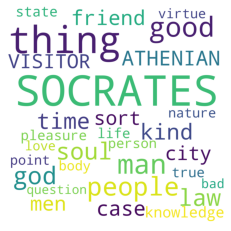

In [10]:
plato_cloud = wordcloud.WordCloud(width = 1500, height = 1500,
    max_words = 30, stopwords = final_stopword_list, background_color = 'white').generate(plato_text)
plt.imshow(plato_cloud)
plt.axis("off")
plt.show()

Sanity check: Plato's work contains a lot of dialogues and contents with Socrates. The topics of Plato's discussion centers around concepts related to qualities of good men and good friends, existence/immortality of soul, and why virtuous people live the happiest life. Overall, the word cloud displays patterns that is similar.

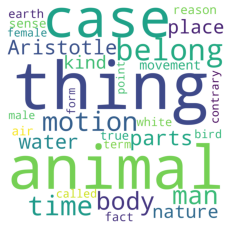

In [11]:
aristotle_cloud = wordcloud.WordCloud(width = 1500, height = 1500,
    max_words = 30, stopwords = final_stopword_list, background_color = 'white').generate(aristotle_text)
plt.imshow(aristotle_cloud)
plt.axis("off")
plt.show()

Sanity check: Aristotle's work include concepts like animals and other natural scientific topics. So this word cloud does make sense. 

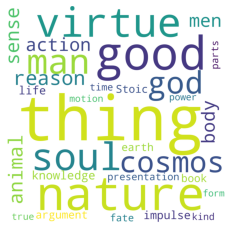

In [12]:
stoicism_cloud = wordcloud.WordCloud(width = 2000, height = 2000,
    max_words = 30, stopwords = final_stopword_list, background_color = 'white').generate(stoicism_text)
plt.imshow(stoicism_cloud)
plt.axis("off")
plt.show()

Sanity check: Stoicism emphasizes a LOT on virtues. Stoicists believe that virtue is the only good in men. He also spent time discussing topics related to souls, nature, gods and the universe. So this word cloud makes sense.

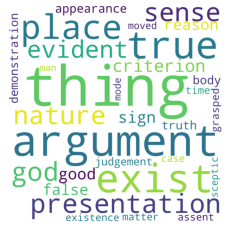

In [13]:
scepticism_cloud = wordcloud.WordCloud(width = 2000, height = 2000,
    max_words = 30, stopwords = final_stopword_list, background_color = 'white').generate(scepticism_text)
plt.imshow(scepticism_cloud)
plt.axis("off")
plt.show()

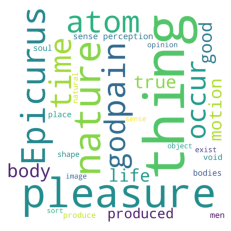

In [14]:
epicureanism_cloud = wordcloud.WordCloud(width = 2000, height = 2000,
    max_words = 30, stopwords = final_stopword_list, background_color = 'white').generate(epicureanism_text)
plt.imshow(epicureanism_cloud)
plt.axis("off")
plt.show()

## Frequency Distribution

In [15]:
texts_comp_string = (' . ').join(texts_comp)
texts_comp_string = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â\n\r]', ' ', texts_comp_string)
texts_comp_string = re.sub(r'[0123456789]', ' ', texts_comp_string)

In [16]:
nltk.download('punkt')
texts_tokenized = word_tokenize(texts_comp_string)

[nltk_data] Downloading package punkt to /Users/jiayibai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


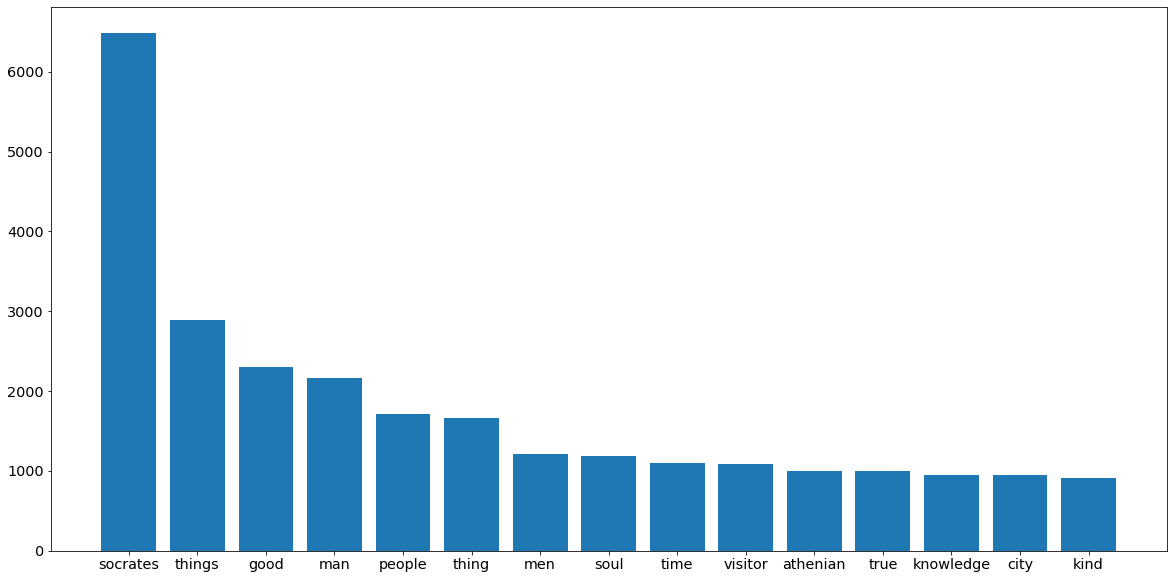

In [17]:
#Plato Frequency
plato_tokenized = word_tokenize(plato_text)
plato_cleaned = [x.lower() for x in plato_tokenized if x.lower() not in final_stopword_list]
plato_freq = FreqDist(plato_cleaned)
fig = plt.subplots(figsize=(20, 10))
plt.bar(x=[x[0] for x in plato_freq.most_common(15)], height=[x[1] for x in plato_freq.most_common(15)])
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.show()

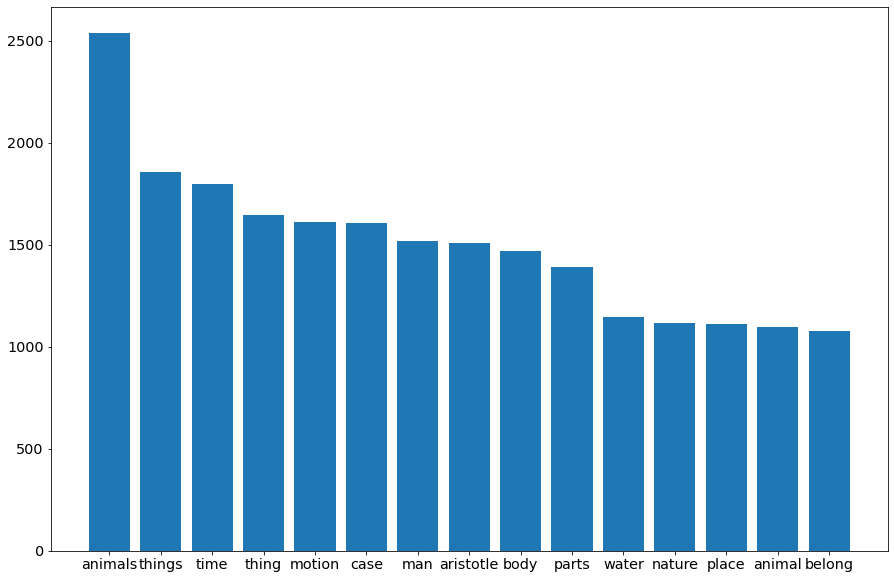

In [18]:
#Aristotle Frequency
aristotle_tokenized = word_tokenize(aristotle_text)
aristotle_cleaned = [x.lower() for x in aristotle_tokenized if x.lower() not in final_stopword_list]
aristotle_freq = FreqDist(aristotle_cleaned)
fig = plt.subplots(figsize=(15, 10))
plt.bar(x=[x[0] for x in aristotle_freq.most_common(15)], height=[x[1] for x in aristotle_freq.most_common(15)])
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.show()

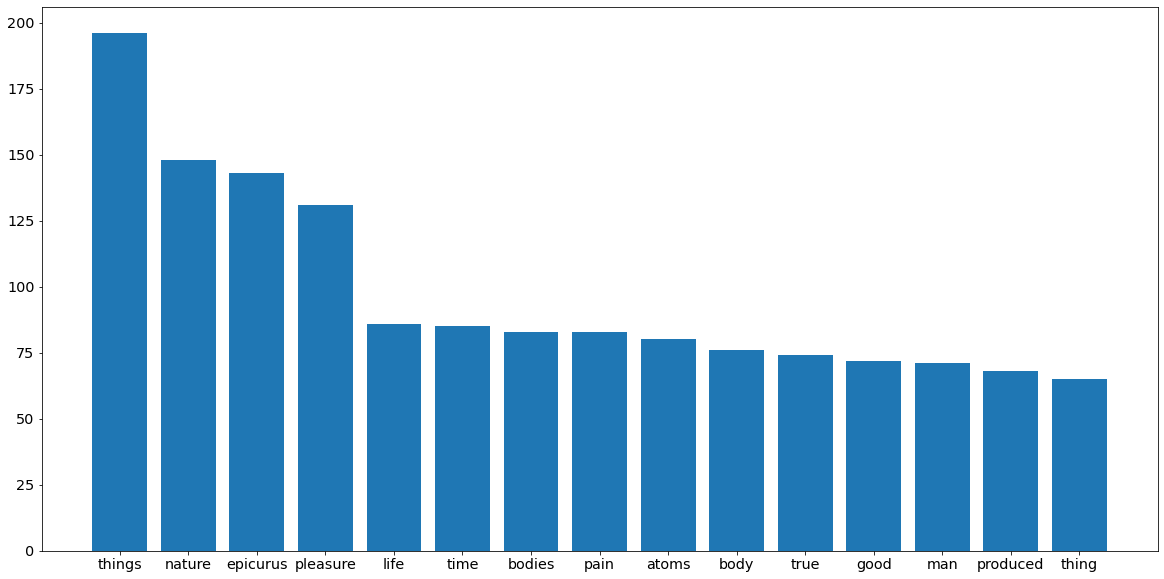

In [19]:
#Epicurean Frequency
epicureanism_tokenized = word_tokenize(epicureanism_text)
epicureanism_cleaned = [x.lower() for x in epicureanism_tokenized if x.lower() not in final_stopword_list]
epicureanism_freq = FreqDist(epicureanism_cleaned)
fig = plt.subplots(figsize=(20, 10))
plt.bar(x=[x[0] for x in epicureanism_freq.most_common(15)], height=[x[1] for x in epicureanism_freq.most_common(15)])
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.show()

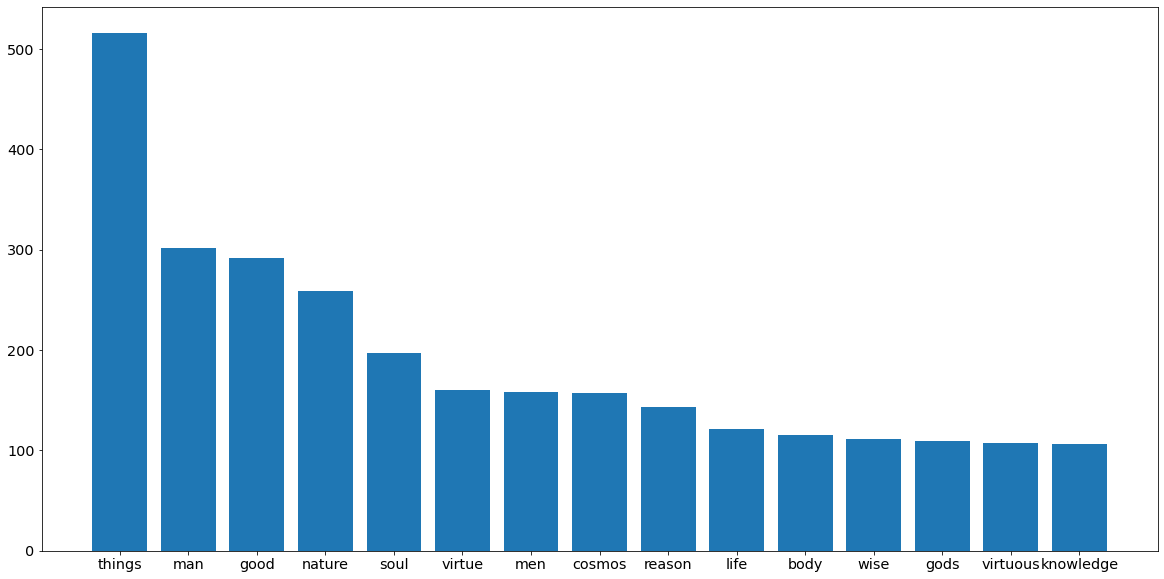

In [20]:
#Stoicism Frequency
stoicism_tokenized = word_tokenize(stoicism_text)
stoicism_cleaned = [x.lower() for x in stoicism_tokenized if x.lower() not in final_stopword_list]
stoicism_freq = FreqDist(stoicism_cleaned)
fig = plt.subplots(figsize=(20, 10))
plt.bar(x=[x[0] for x in stoicism_freq.most_common(15)], height=[x[1] for x in stoicism_freq.most_common(15)])
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.show()

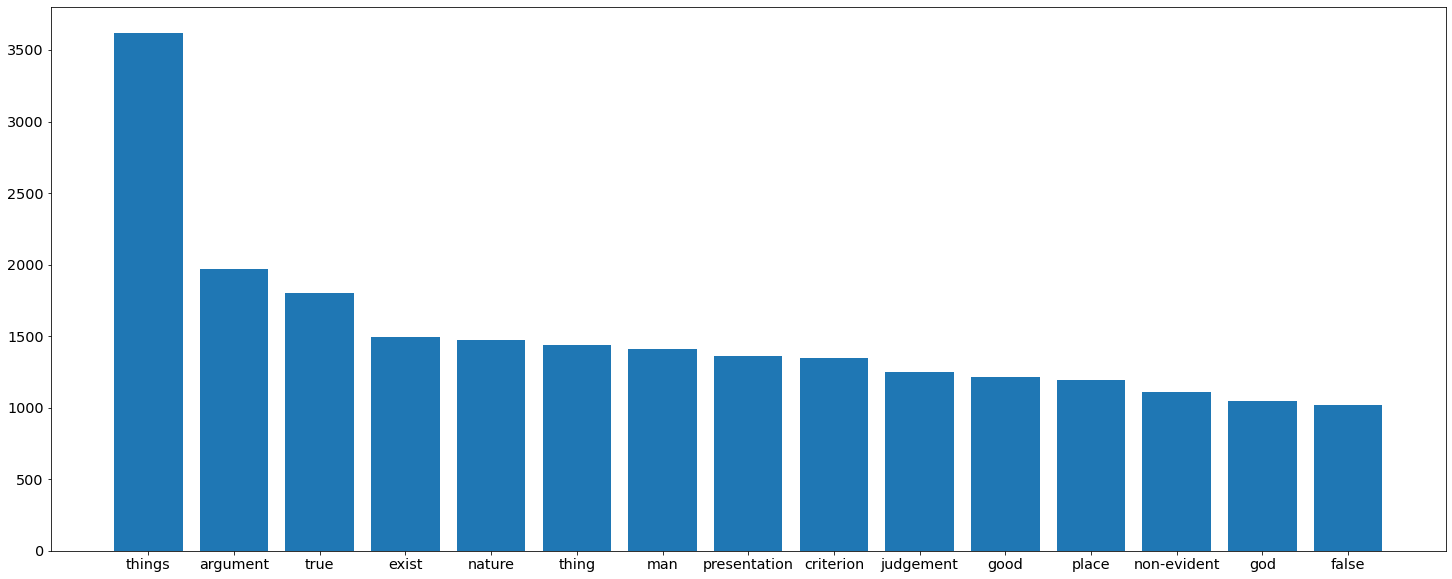

In [21]:
#Scepticism Frequency
scepticism_tokenized = word_tokenize(scepticism_text)
scepticism_cleaned = [x.lower() for x in scepticism_tokenized if x.lower() not in final_stopword_list]
scepticism_freq = FreqDist(scepticism_cleaned)
fig = plt.subplots(figsize=(25, 10))
plt.bar(x=[x[0] for x in scepticism_freq.most_common(15)], height=[x[1] for x in scepticism_freq.most_common(15)])
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.show()

## Bigrams

In [22]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
measures = BigramAssocMeasures()

In [23]:
plato_stopword = final_stopword_list + ['socrates', 'protarchus', 'hermogenes', 'hippias', 'callicles', 
                                        'polus', 'phaedrus', 'gorgias', 'alc', 'phd', 'phdr']

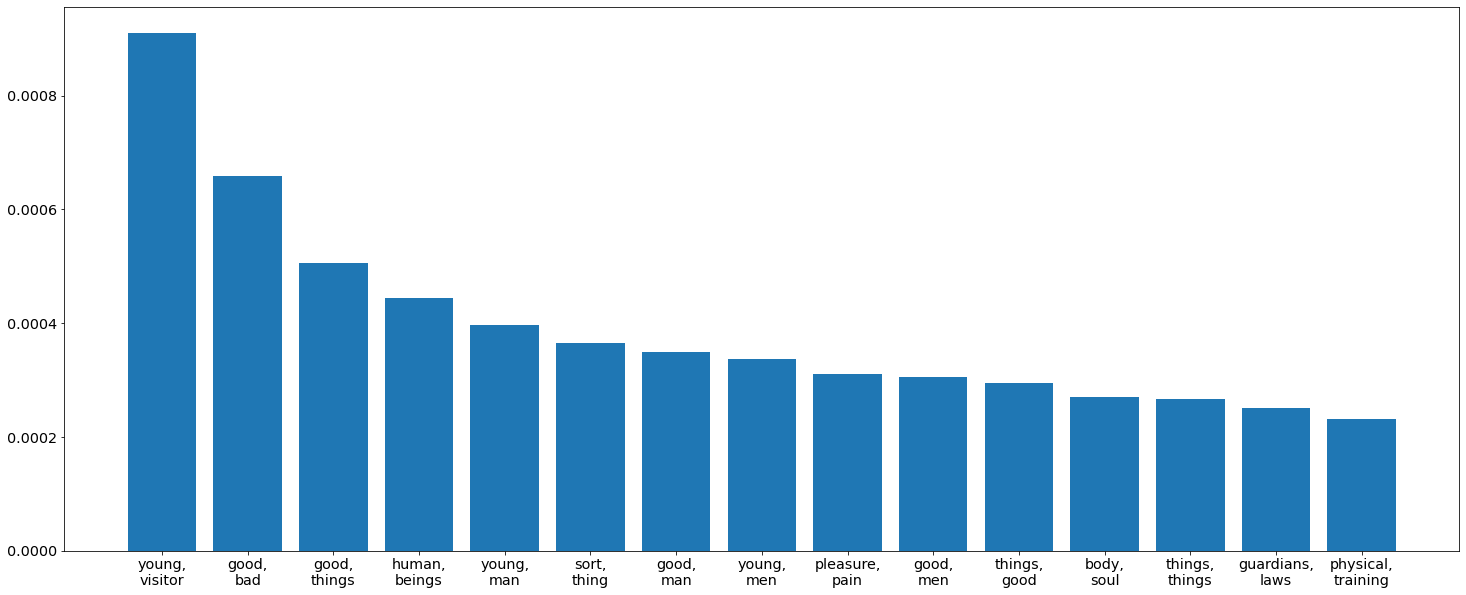

In [24]:
#Plato
plato_regex_tokens = nltk.regexp_tokenize(plato_text, pattern)
plato_regex_clean = [x.lower() for x in plato_regex_tokens if x.lower() not in plato_stopword]
plato_finder = BigramCollocationFinder.from_words(plato_regex_clean)
plato_scored = plato_finder.score_ngrams(measures.raw_freq)
fig = plt.subplots(figsize=(25, 10))
plato_labels = [',\n'.join(x[0]) for x in plato_scored[:15]]
plato_heights = [x[1] for x in plato_scored[:15]]
plt.bar(plato_labels, plato_heights)
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.show()

In [25]:
aristotle_stopwords = final_stopword_list + ['aristotle', 'oxford', 'translation', 'belongs', 'princeton', 
                                             'works', 'book', 'press','text','belong', 'jonathan', 'bames']

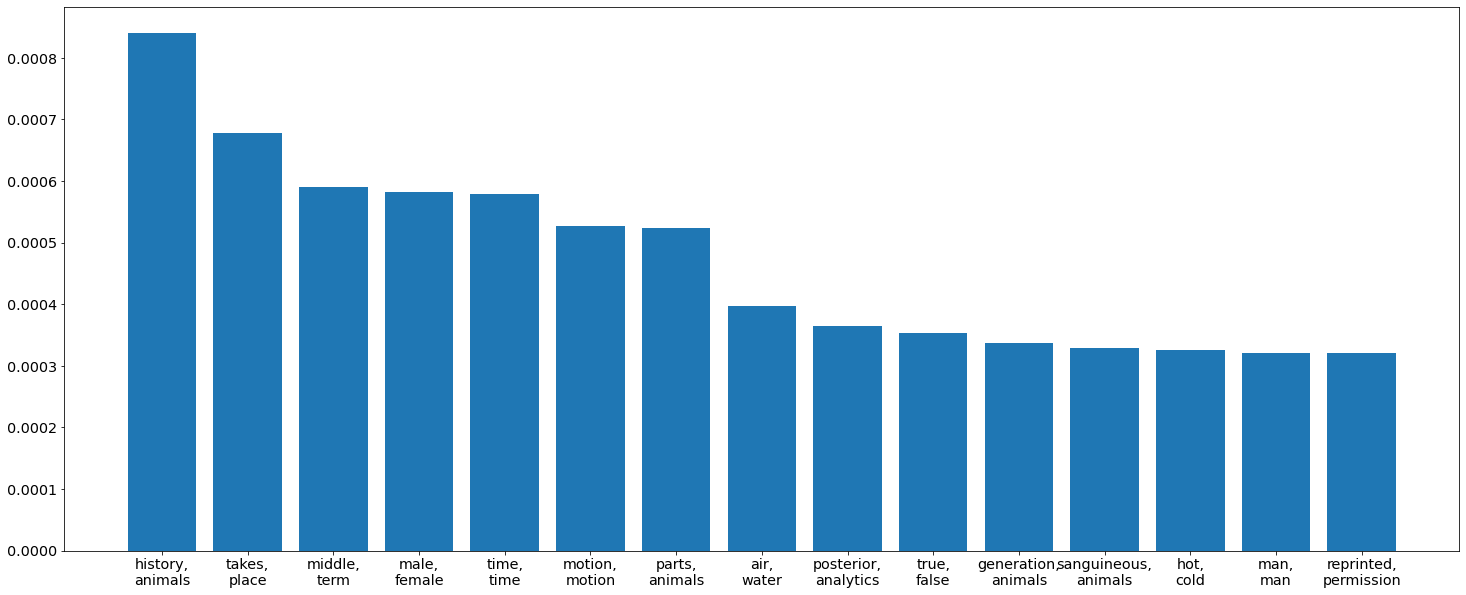

In [26]:
#Aristotle
aristotle_regex_tokens = nltk.regexp_tokenize(aristotle_text, pattern)
aristotle_regex_clean = [x.lower() for x in aristotle_regex_tokens if x.lower() not in aristotle_stopwords]
aristotle_finder = BigramCollocationFinder.from_words(aristotle_regex_clean)
aristotle_scored = aristotle_finder.score_ngrams(measures.raw_freq)
fig = plt.subplots(figsize=(25, 10))
aristotle_labels = [',\n'.join(x[0]) for x in aristotle_scored[:15]]
aristotle_heights = [x[1] for x in aristotle_scored[:15]]
plt.bar(aristotle_labels, aristotle_heights)
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.show()

In [27]:
epicureanism_stopwords = final_stopword_list + ['aetius', 'diogenes', 'laertius', 'plutarch']

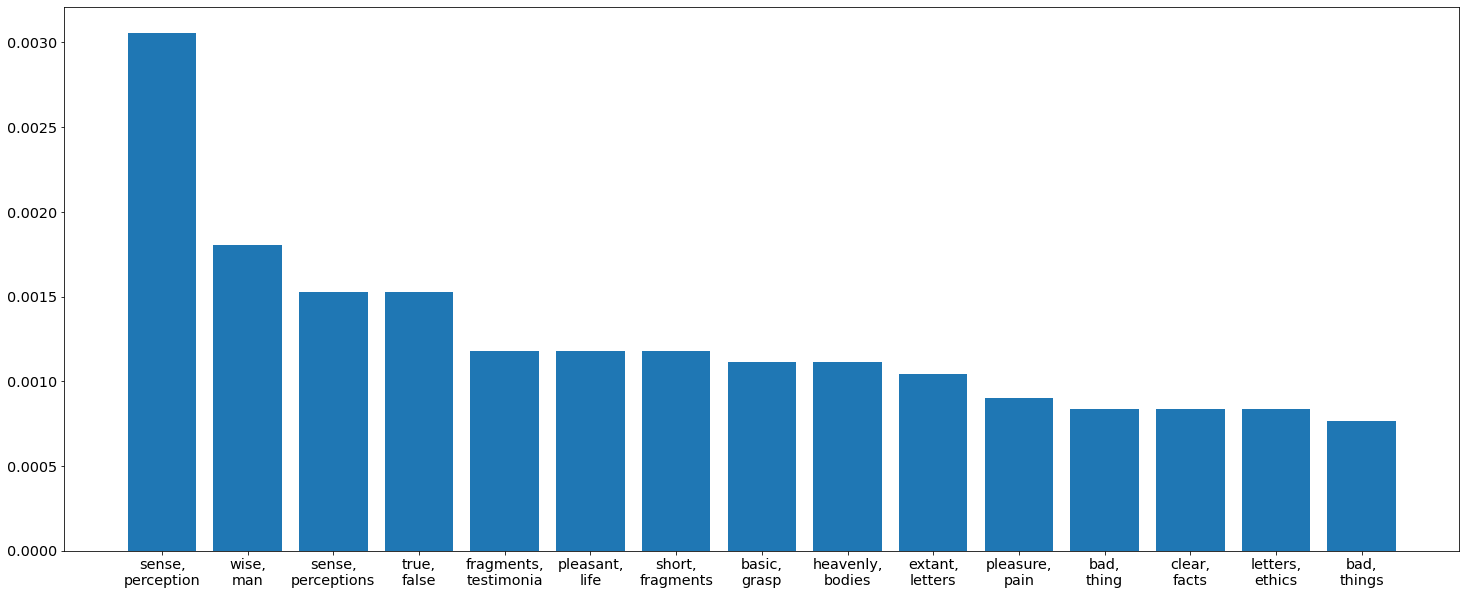

In [28]:
#epicureanism
epicureanism_regex_tokens = nltk.regexp_tokenize(epicureanism_text, pattern)
epicureanism_regex_clean = [x.lower() for x in epicureanism_regex_tokens if x.lower() not in epicureanism_stopwords]
epicureanism_finder = BigramCollocationFinder.from_words(epicureanism_regex_clean)
epicureanism_scored = epicureanism_finder.score_ngrams(measures.raw_freq)
fig = plt.subplots(figsize=(25, 10))
epicureanism_labels = [',\n'.join(x[0]) for x in epicureanism_scored[:15]]
epicureanism_heights = [x[1] for x in epicureanism_scored[:15]]
plt.bar(epicureanism_labels, epicureanism_heights)
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.show()

In [29]:
scepticism_stopword = final_stopword_list + ['sextus', 'empiricus']

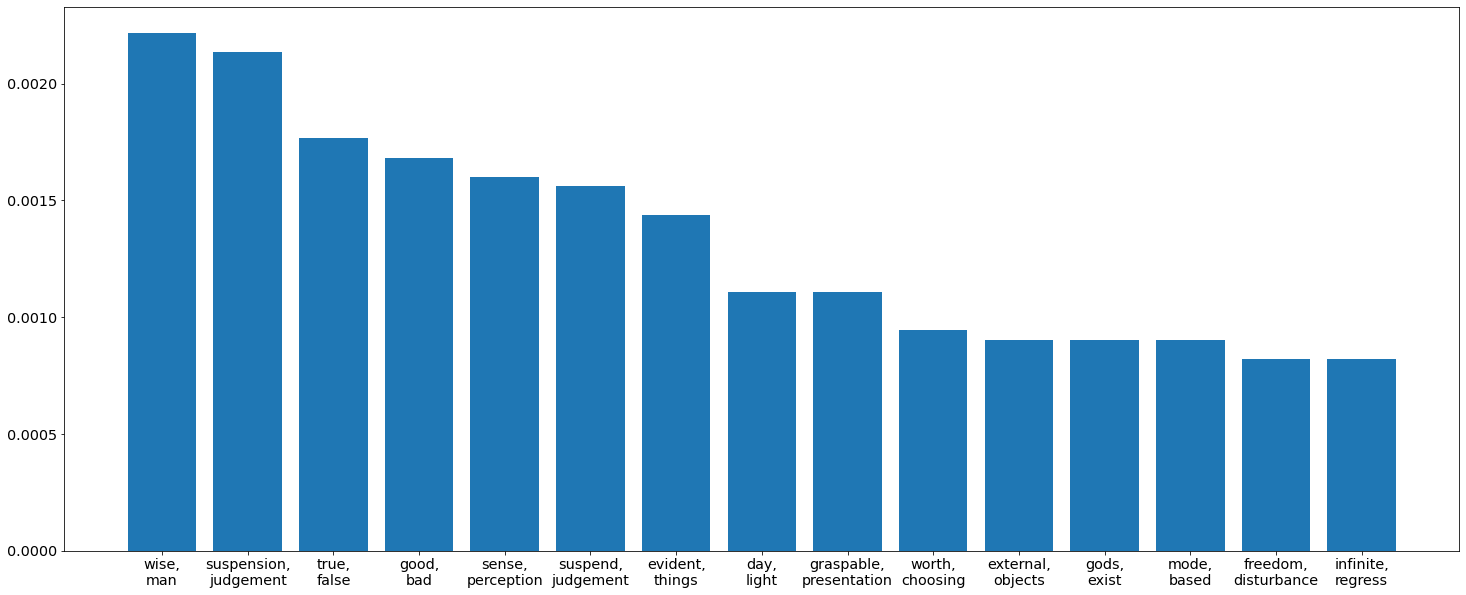

In [30]:
#scepticism
scepticism_regex_tokens = nltk.regexp_tokenize(scepticism_text, pattern)
scepticism_regex_clean = [x.lower() for x in scepticism_regex_tokens if x.lower() not in scepticism_stopword]
scepticism_finder = BigramCollocationFinder.from_words(scepticism_regex_clean)
scepticism_scored = scepticism_finder.score_ngrams(measures.raw_freq)
fig = plt.subplots(figsize=(25, 10))
scepticism_labels = [',\n'.join(x[0]) for x in scepticism_scored[:15]]
scepticism_heights = [x[1] for x in scepticism_scored[:15]]
plt.bar(scepticism_labels, scepticism_heights)
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.show()

In [31]:
stoicism_stopword = final_stopword_list

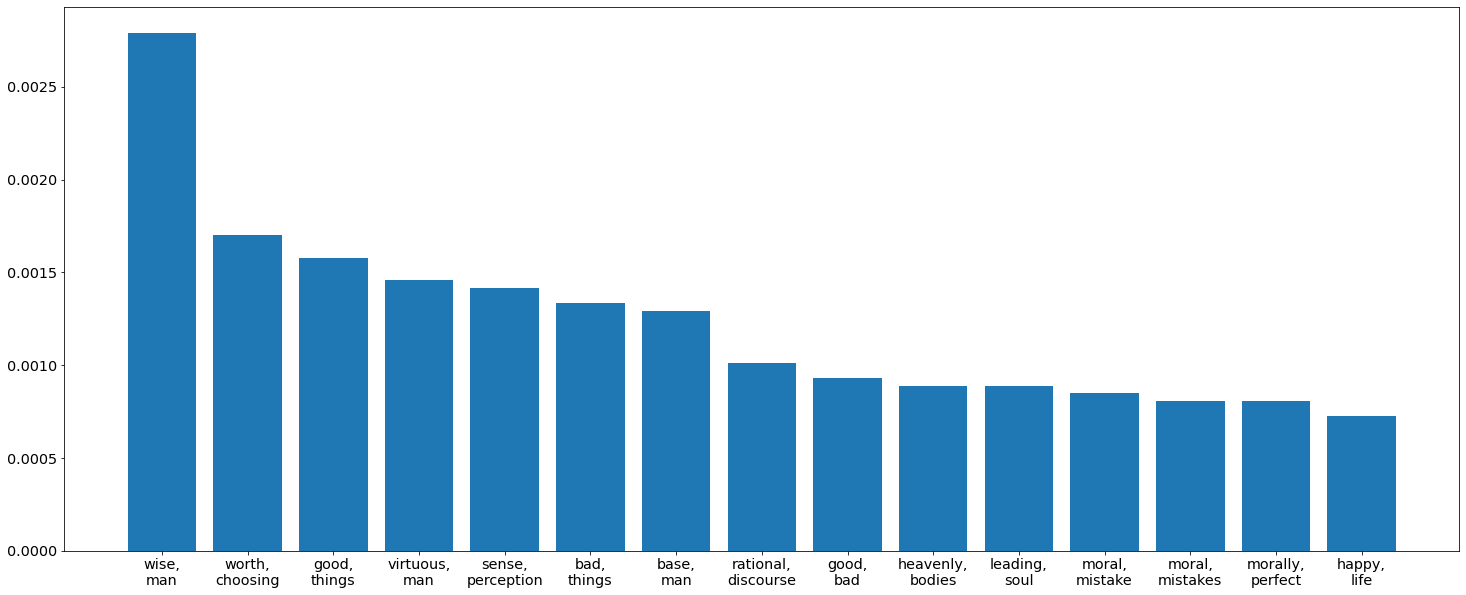

In [32]:
#stoicism
stoicism_regex_tokens = nltk.regexp_tokenize(stoicism_text, pattern)
stoicism_regex_clean = [x.lower() for x in stoicism_regex_tokens if x.lower() not in stoicism_stopword]
stoicism_finder = BigramCollocationFinder.from_words(stoicism_regex_clean)
stoicism_scored = stoicism_finder.score_ngrams(measures.raw_freq)
fig = plt.subplots(figsize=(25, 10))
stoicism_labels = [',\n'.join(x[0]) for x in stoicism_scored[:15]]
stoicism_heights = [x[1] for x in stoicism_scored[:15]]
plt.bar(stoicism_labels, stoicism_heights)
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.show()

## In-Depth Cleaning

In [33]:
#Source: https://github.com/kcalizadeh/phil_nlp
def baseline_clean(to_correct):
  # remove utf8 encoding characters and some punctuations
  result = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\\\£\Â*_<>""⎫•{}Γ~]', ' ', to_correct)
  result = re.sub(r'[\u2014\u2013\u2012-]', ' ', result)

  # replace whitespace characters with actual whitespace
  result = re.sub(r'\s', ' ', result)

  # replace odd quotation marks with a standard
  result = re.sub(r'[‘’“”]', "'", result)

  # replace the ﬀ, ﬃ and ﬁ with the appropriate counterparts
  result = re.sub(r'ﬀ', 'ff', result)
  result = re.sub(r'ﬁ', 'fi', result)
  result = re.sub(r'ﬃ', 'ffi', result)

  # remove or standardize some recurring common and meaninless words/phrases
  result = re.sub(r'\s*This\s*page\s*intentionally\s*left\s*blank\s*', ' ', result)
  result = re.sub(r'(?i)Aufgabe\s+', ' ', result)
  result = re.sub(r',*\s+cf\.', ' ', result)

  # unify some abbreviations
  result = re.sub(r'&', 'and', result)
  result = re.sub(r'\se\.g\.\s', ' eg ', result)
  result = re.sub(r'\si\.e\.\s', ' ie ', result)
  result = re.sub('coroll\.', 'coroll', result)
  result = re.sub('pt\.', 'pt', result)

  # remove roman numerals, first capitalized ones
  result = re.sub(r'\s((I{2,}V*X*\.*)|(IV\.*)|(IX\.*)|(V\.*)|(V+I*\.*)|(X+L*V*I*]\.*))\s', ' ', result)
  # then lowercase
  result = re.sub(r'\s((i{2,}v*x*\.*)|(iv\.*)|(ix\.*)|(v\.*)|(v+i*\.*)|(x+l*v*i*\.*))\s', ' ', result)

  # remove periods and commas flanked by numbers
  result = re.sub(r'\d\.\d', ' ', result)
  result = re.sub(r'\d,\d', ' ', result)

  # remove the number-letter-number pattern used for many citations
  result = re.sub(r'\d*\w{,2}\d', ' ', result)

  # remove numerical characters
  result = re.sub(r'\d+', ' ', result)

  # remove isolated colons and semicolons that result from removal of titles
  result = re.sub(r'\s+:\s*', ' ', result)
  result = re.sub(r'\s+;\s*', ' ', result)

  # remove isolated letters (do it several times because strings of isolated letters do not get captured properly)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)

  # remove isolated letters at the end of sentences or before commas
  result = re.sub(r'\s[^aI]\.', '.', result)
  result = re.sub(r'\s[^aI],', ',', result)

  # deal with spaces around periods and commas
  result = re.sub(r'\s+,\s+', ', ', result)
  result = re.sub(r'\s+\.\s+', '. ', result)

  # remove empty parantheses
  result = re.sub(r'(\(\s*\.*\s*\))|(\(\s*,*\s*)\)', ' ', result)

  # reduce multiple periods, commas, or whitespaces into a single one
  result = re.sub(r'\.+', '.', result)
  result = re.sub(r',+', ',', result)
  result = re.sub(r'\s+', ' ', result)

  return result

### Removing headings and other offensive features

In [34]:
plato_remove = ['Euthyphro', 'Apology', 'Sophist', 'Statesman', 'Symposium', 
                 'Second Alcibiades', 'Rival Lovers', 'Greater Hippias', 
                 'Lesser Hippias', 'Republic', 'Laws', 'Letters', 'Definitions',
                 'On Virtue', 'On Justice', 'Epigrams', 'Translated b.+\.', ] 
aristotle_remove = []
epicureanism_remove = ['The Ancient Biography of Epicurus', 'The Extant Letters', 'Ancient Collections of Maxims',
                      'Doxographical Reports', 'The Testimony of Cicero', 'The Testimony of Lucretius', 
                       'The Polemic of Plutarch', 'Short Fragments and Testimonia from Known Works',
                      'Short Fragments and Testimonia from Uncertain Works', 'Logic and Epistemology', 
                      'Physics and Theology', 'Ethics']
stoicism_remove = ['Lives of the Stoics', 'On Philosophy', 'Logic and Theory of Knowledge',
                   'Physics', 'On Fate', 'Ethics']
scepticism_remove = ['Academic Scepticism: Arcesilaus and Carneades', 'Pyrrhonian Scepticism',
                     'Pyrrho', 'Timon', 'Aenesidemus', 'Later Pyrrhonism: Sextus Empiricus', 
                     'General Principles', 'The Modes', 'Logic', 'Physics', 'Ethics']

### To dictionary:

In [61]:
from sklearn.utils import resample

In [87]:
#all texts
all_texts = [plato_text, aristotle_text, stoicism_text, epicureanism_text, scepticism_text]
print(len(plato_text))
print(len(aristotle_text))
print(len(stoicism_text))
print(len(epicureanism_text))
print(len(scepticism_text))


#schools
schools = ['plato', 'aristotle','stoicism', 'epicureanism','scepticism']
#words to remove
all_to_remove = [plato_remove, aristotle_remove, stoicism_remove, epicureanism_remove, scepticism_remove]

#final dict
final_dicts = []
for i in range(5):
    book_dict = {}
    book_dict['school'] = schools[i]
    book_dict['to remove'] = all_to_remove[i]
    book_dict['text'] = all_texts[i]
    final_dicts.append(book_dict)

5004358
4602317
440742
265585
4617288


### To dataframe:

In [55]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [88]:
def remove_words(text, word_list):
    for word in word_list:
        text = re.sub(r''+word+'', ' ', text)
        text = re.sub(r'\s+', ' ', text)
    return text


def from_raw_to_df(text_dict):
    nlp.max_length = 9000000
    text = text_dict['text']
    text = remove_words(text, text_dict['to remove'])
    text = baseline_clean(text)
    text_nlp = nlp(text) 
    text_df = pd.DataFrame(columns=['school', 'sentence_spacy'])
    text_df['sentence_spacy'] = list(text_nlp.sents)
    text_df['school'] = text_dict['school']
    text_df['sentence_str'] = text_df['sentence_spacy'].apply(lambda x: ''.join(list(str(x))))
    return text_df


df = pd.DataFrame(columns=['school', 'sentence_spacy', 'sentence_str'])
for book_dict in final_dicts:
    book_df = from_raw_to_df(book_dict)
    df = df.append(book_df, ignore_index=True)

len(df)

74083

In [89]:
pd.options.display.max_colwidth = 200
df.sample(10)

,school,sentence_spacy,sentence_str
2278,aristotle,"(Consequently, we, shall, get, the, first, figure, ,, if, A, belongs, to, every, ,, and, to, some, .)","Consequently we shall get the first figure, if A belongs to every, and to some."
10432,aristotle,"(If, the, units, are, actual, ,, it, is, not, possible, ;, if, they, are, potential, ,, it, is, possible, .)","If the units are actual, it is not possible; if they are potential, it is possible."
56279,scepticism,"(Index, of, Passages)",Index of Passages
64796,scepticism,"(On, the, Nature, of, Things, [, III, excerpts, Plotinus, .)",On the Nature of Things [III excerpts Plotinus.
25464,aristotle,"(Thus, it, is, that, the, bones, of, males, are, harder, than, those, of, females, ;, and, the, bones, of, flesh, eaters, ,, that, get, their, food, by, fighting, ,, are, harder, than, those, of, ...","Thus it is that the bones of males are harder than those of females; and the bones of flesh eaters, that get their food by fighting, are harder than those of others."
61471,scepticism,"((, selections, ), [, III, .)",(selections) [III.
2195,aristotle,"(BOOK, I, no, analysis, ;, for, A, will, be, true, of, ,, but, will, not, be, true, of, .)","BOOK I no analysis; for A will be true of, but will not be true of."
15994,aristotle,"(For, the, most, part, ,, Aristotle, is, terse, ,, compact, ,, abrupt, ,, his, arguments, condensed, ,, his, thought, dense, .)","For the most part, Aristotle is terse, compact, abrupt, his arguments condensed, his thought dense."
69781,scepticism,"(dom, from, ), .)",dom from).
1996,aristotle,"(Perhaps, each, of, these, statements, will, become, clearer, in, the, following, way, .)",Perhaps each of these statements will become clearer in the following way.


In [90]:
df['school'].value_counts(normalize=True)

scepticism      0.513033
aristotle       0.419084
stoicism        0.042857
epicureanism    0.024230
plato           0.000796
Name: school, dtype: float64

In [91]:
df['sentence_length'] = df['sentence_str'].map(lambda x: len(x))
num_of_short_entries = len(df[df['sentence_length'] < 20])
print(f"there are {num_of_short_entries} so-called sentences with fewer than 20 characters")
df[df['sentence_length'] < 20].sample(5)
df = df.drop(df[df['sentence_length'] < 20].index)
len(df)

there are 8775 so-called sentences with fewer than 20 characters


65308

In [105]:
fn_words = ['ch\.', 'cf']

df['sentence_lowered'] = df['sentence_str'].map(lambda x: x.lower())

fn_df = pd.DataFrame()
for word in fn_words:
  found_word = df[df['sentence_lowered'].str.contains('\s' + word.lower())].copy()
  found_word['word'] = word
  fn_df = fn_df.append(found_word)

len(fn_df)

49

In [106]:
fn_df.sample(5)

,school,sentence_spacy,sentence_str,sentence_length,sentence_lowered,word
14296,aristotle,"(We, must, now, explain, why, the, sea, is, salt, ,, and, ask, whether, it, is, always, the, Phaedo, Cff, .)","We must now explain why the sea is salt, and ask whether it is always the Phaedo Cff.",85,"we must now explain why the sea is salt, and ask whether it is always the phaedo cff.",cf
62328,scepticism,"(How, freedom, from, disturbance, enters, the, soul, along, with, suspension, of, judgement, we, shall, explain, in, the, chapter, on, the, goal, [, of, scepticismV, Ch, .)",How freedom from disturbance enters the soul along with suspension of judgement we shall explain in the chapter on the goal [of scepticismV Ch.,143,how freedom from disturbance enters the soul along with suspension of judgement we shall explain in the chapter on the goal [of scepticismv ch.,ch\.
37715,scepticism,"(And, so, ,, for, these, reasons, ,, the, criterion, ', by, means, of, which, ', would, be, unreal, Ch, .)","And so, for these reasons, the criterion 'by means of which' would be unreal Ch.",80,"and so, for these reasons, the criterion 'by means of which' would be unreal ch.",ch\.
49753,scepticism,"(Sextus, Empiricus, :, Sextus, PH, [, III, Ch, .)",Sextus Empiricus: Sextus PH [III Ch.,36,sextus empiricus: sextus ph [iii ch.,ch\.
70977,scepticism,"(Sextus, Empiricus, :, Ch, .)",Sextus Empiricus: Ch.,21,sextus empiricus: ch.,ch\.


In [107]:
len(df['sentence_str'])-len(df['sentence_str'].drop_duplicates())

29978

In [110]:
self_mention_df = pd.DataFrame()
for school in df['school'].unique():
  self_mention_slice = df[(df['school'] == school) & 
                          (df['sentence_lowered'].str.contains('\s'+school.lower()))].copy()
  self_mention_df = self_mention_df.append(self_mention_slice)

len(self_mention_df)

1481

In [111]:
self_mention_df.sample(5)

,school,sentence_spacy,sentence_str,sentence_length,sentence_lowered
13587,aristotle,"(The, text, of, Aristotle, :, The, Complete, Works, is, The, Revised, Oxford, Translation, of, The, Complete, Works, of, Aristotle, ,, edited, by, Jonathan, Barnes, ,, and, published, by, Princeto...","The text of Aristotle: The Complete Works is The Revised Oxford Translation of The Complete Works of Aristotle, edited by Jonathan Barnes, and published by Princeton University Press in.",186,"the text of aristotle: the complete works is the revised oxford translation of the complete works of aristotle, edited by jonathan barnes, and published by princeton university press in."
29017,aristotle,"(For, such, residual, matter, is, secreted, largely, in, the, heavy, birds, not, given, to, flying, ,, such, as, fowls, ,, partridges, ,, and, so, on, ,, and, that, is, why, their, Aristotle, male...","For such residual matter is secreted largely in the heavy birds not given to flying, such as fowls, partridges, and so on, and that is why their Aristotle males tread often and their females produ...",213,"for such residual matter is secreted largely in the heavy birds not given to flying, such as fowls, partridges, and so on, and that is why their aristotle males tread often and their females produ..."
16553,aristotle,"(I, call, by, the, name, of, special, object, of, this, or, that, sense, that, which, can, not, be, perceived, by, any, other, sense, than, that, one, and, in, respect, of, which, no, error, is, p...",I call by the name of special object of this or that sense that which cannot be perceived by any other sense than that one and in respect of which no error is possible; in this sense colour is the...,269,i call by the name of special object of this or that sense that which cannot be perceived by any other sense than that one and in respect of which no error is possible; in this sense colour is the...
3205,aristotle,"(The, original, Translation, is, often, paraphrastic, :, some, of, the, translators, used, paraphrase, freely, and, deliberately, ,, attempting, not, so, much, to, English, Aristotle, 's, Greek, a...","The original Translation is often paraphrastic: some of the translators used paraphrase freely and deliberately, attempting not so much to English Aristotle's Greek as to explain in their own word...",283,"the original translation is often paraphrastic: some of the translators used paraphrase freely and deliberately, attempting not so much to english aristotle's greek as to explain in their own word..."
30536,aristotle,"(A, quantity, of, work, has, been, done, on, the, Greek, text, of, Aristotle, during, the, past, half, century, :, in, many, cases, new, and, better, texts, are, now, available, ,, and, the, revis...","A quantity of work has been done on the Greek text of Aristotle during the past half century: in many cases new and better texts are now available, and the reviser has from time to time emended th...",249,"a quantity of work has been done on the greek text of aristotle during the past half century: in many cases new and better texts are now available, and the reviser has from time to time emended th..."


In [113]:
for school in df['school'].unique():
  df = df.drop(df[(df['school'] == school) & 
                  (df['sentence_lowered'].str.contains('\s'+school.lower()))].index)

len(df)

63827

In [115]:
len(df['sentence_str'])-len(df['sentence_str'].drop_duplicates())

29010

In [116]:
for school in df['school'].unique():
  print(school)
  print(len(df.loc[df['school'] == school]['sentence_str']) - 
        len(df.loc[df['school'] == school]['sentence_str'].drop_duplicates()))

plato
0
aristotle
1809
stoicism
22
epicureanism
23
scepticism
27151


In [118]:
doubles_df = pd.concat(g for _, g in df.groupby("sentence_str") if len(g) > 1)
doubles_df.sample(5)

,school,sentence_spacy,sentence_str,sentence_length,sentence_lowered
48511,scepticism,"(as, crite, b, ;, see, also, virtue, ,, rion, of, choice, :, wisdom, /, wise, man, .)","as crite b; see also virtue, rion of choice: wisdom/wise man.",61,"as crite b; see also virtue, rion of choice: wisdom/wise man."
30783,aristotle,"(On, the, whole, ,, the, reviser, has, been, conservative, ,, sometimes, against, his, inclination, .)","On the whole, the reviser has been conservative, sometimes against his inclination.",83,"on the whole, the reviser has been conservative, sometimes against his inclination."
30533,aristotle,"(The, revisions, have, been, slight, ,, more, abundant, in, some, treatises, than, in, others, but, amounting, ,, on, the, average, ,, to, some, fifty, alterations, for, each, Bekker, page, of, Gr...","The revisions have been slight, more abundant in some treatises than in others but amounting, on the average, to some fifty alterations for each Bekker page of Greek.",166,"the revisions have been slight, more abundant in some treatises than in others but amounting, on the average, to some fifty alterations for each bekker page of greek."
72938,scepticism,"(Antiochus, of, Ascalon, :, ca.c, .)",Antiochus of Ascalon: ca.c.,27,antiochus of ascalon: ca.c.
42130,scepticism,"(And, if, the, sign, is, not, grasped, with, precision, ,, it, will, not, be, said, to, be, significative, of, something, since, it, itself)","And if the sign is not grasped with precision, it will not be said to be significative of something since it itself",115,"and if the sign is not grasped with precision, it will not be said to be significative of something since it itself"


In [136]:
len(doubles_df[doubles_df['school'] == 'scepticism'])

30528

In [137]:
doubles_df[doubles_df['school'] == 'scepticism'].sample(5)

,school,sentence_spacy,sentence_str,sentence_length,sentence_lowered
70860,scepticism,"(Speaking, rather, generally, ,, suspen, sion, of, judgement, comes, about, through, the, opposition, of, things, .)","Speaking rather generally, suspen sion of judgement comes about through the opposition of things.",97,"speaking rather generally, suspen sion of judgement comes about through the opposition of things."
60190,scepticism,"(rejected, (, apoproegmenon, ), :)",rejected (apoproegmenon):,25,rejected (apoproegmenon):
38101,scepticism,"(owing, to, which, he, is, not, able, to, be, provident, of, things, of, which, he, is, .)",owing to which he is not able to be provident of things of which he is.,71,owing to which he is not able to be provident of things of which he is.
37381,scepticism,"(Again, ,, generally, ,, some, animals, are, viviparous, (, like, humans, ), and, some, oviparous, (, like, birds, ), ,, while, others, produce, unformed, heaps, of, flesh, (, like, bears, ), .)","Again, generally, some animals are viviparous (like humans) and some oviparous (like birds), while others produce unformed heaps of flesh (like bears).",151,"again, generally, some animals are viviparous (like humans) and some oviparous (like birds), while others produce unformed heaps of flesh (like bears)."
60133,scepticism,"(In, an, adult, human, it, is, totally, rational, .)",In an adult human it is totally rational.,41,in an adult human it is totally rational.


In [142]:
df = df.drop(df[(df['school']=='aristotle') & (df['sentence_length'] < 55)].index)
df = df.drop(df[(df['school']=='scepticism') & (df['sentence_length'] < 50)].index)

len(df)

53285

In [143]:
df['school'].value_counts(normalize=True)

aristotle       0.477902
scepticism      0.437459
stoicism        0.053936
epicureanism    0.029933
plato           0.000769
Name: school, dtype: float64